In [136]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [137]:
# Read CSV file

df = pd.read_csv('my-financial-statement.csv')

# Stop the warning: A value is trying to be set on a copy of a slice from a DataFrame

pd.set_option('mode.chained_assignment', None)

In [138]:
# CLEANS DATA

# Drop unusable columns

data = df.drop(['Details', 'Particulars', 'Reference', 'ForeignCurrencyAmount', 'ConversionCharge'], axis=1)


# Change Column contents to lower case

data['Code'] = data['Code'].str.lower()


# Remove rows that are not visa purchase

selected_df = data.loc[df['Type'] == 'Visa Purchase']


# Select food expenses

supermarkets = selected_df['Code'].str.contains('new world|countdown|pak n save')
supermarkets_df = selected_df[supermarkets]

# Remove the minus sign in the Amount column

supermarkets_df['Amount'] = supermarkets_df['Amount'].abs()
supermarkets_df


,Type,Code,Amount,Date
4,Visa Purchase,new world ce,82.26,19/05/2022
12,Visa Purchase,countdown du,91.59,16/05/2022
21,Visa Purchase,new world ce,84.41,12/05/2022
25,Visa Purchase,countdown du,57.70,10/05/2022
27,Visa Purchase,countdown du,42.07,09/05/2022
31,Visa Purchase,new world ce,27.49,06/05/2022
43,Visa Purchase,countdown du,60.89,02/05/2022
45,Visa Purchase,countdown du,20.49,02/05/2022
57,Visa Purchase,countdown du,40.54,27/04/2022
61,Visa Purchase,countdown du,65.63,22/04/2022


In [139]:
# Add monthly grocery expenses together


#Convert expenses to floating numbers

supermarkets_df['Amount'].astype(float)

# Reset index

supermarkets_df.reset_index(drop=True, inplace=True)


# Turn Date column into datetime values

supermarkets_df.loc[:, 'Date'] = pd.to_datetime(supermarkets_df.loc[:, 'Date'], format='%d/%m/%Y')


# Group grocery expenses by month (months in ascending order)

supermarkets_df
final = supermarkets_df.groupby(supermarkets_df['Date'].dt.month)['Amount'].sum()
final_df = final.to_frame()

# months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY']
df2 = final_df.assign(Months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY'])
df2

,Amount,Months
Date,,
1,467.80,JAN
2,387.20,FEB
3,530.35,MAR
4,425.03,APR
5,466.90,MAY


In [140]:
# Calculate the average grocery expenses per month

df2['Amount'].mean()

455.45599999999996

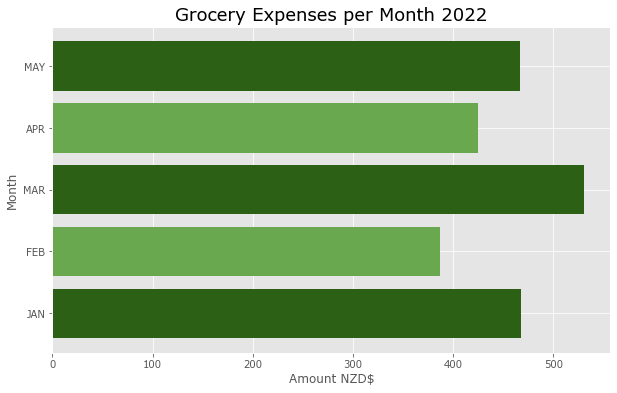

In [141]:
# BAR PLOT

# Define fonts for all text

mpl.rcParams['font.family'] = 'sans-serif'

# Color the colomns in a deeper green color when grocery expense exceed the mean value 455

colors = ['#6aa84f' if (money < 455) else '#2c6115' for money in df2['Amount']]

# Adjust bar plot size

fig, ax = plt.subplots(figsize=(10,6))

# Bar plotting

plt.barh(y=df2['Months'], width=df2['Amount'], color=colors)

# Add title, x and y labels

plt.title('Grocery Expenses per Month 2022', fontsize=18)
plt.xlabel('Amount NZD$')
plt.ylabel('Month')
plt.yticks(fontsize=10)

plt.show()
